In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Прочитайте csv файл (використовуйте функцію read_csv)

In [83]:
data = pd.read_csv("/content/bestsellers_with_categories.csv")

Виведіть перші п'ять рядків (використовується функція head)

In [84]:
data

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


Виведіть розміри датасету (використовуйте атрибут shape)

In [85]:
data.shape

(550, 7)

Про скільки книг зберігає дані датасет?

Відповідь:550

In [86]:
data.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

**Первинне дослідження даних**

Перевірте, чи у всіх рядків вистачає даних: виведіть кількість пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)

In [77]:
data.isna().sum()

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

Чи є в якихось змінних пропуски? (Так / ні)

Відповідь: ні

Перевірте, які є унікальні значення в колонці genre (використовуйте функцію unique)

In [78]:
data['genre'].unique()

array(['Non Fiction', 'Fiction'], dtype=object)

Які є унікальні жанри?

Відповідь: Non Fiction, Fiction

Тепер подивіться на розподіл цін: побудуйте діаграму (використовуйте kind='hist')

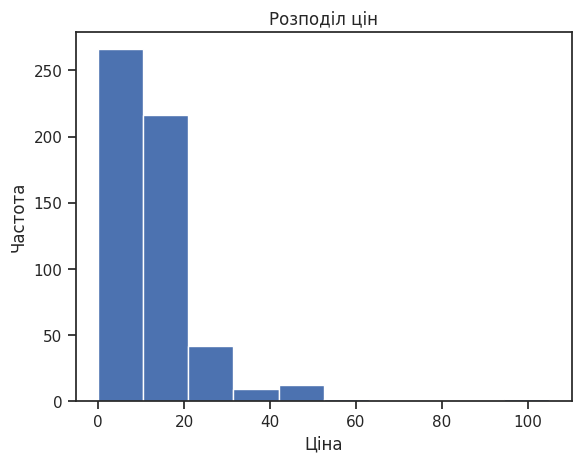

In [15]:
data['price'].plot(kind='hist', bins=10)

plt.xlabel('Ціна')
plt.ylabel('Частота')
plt.title('Розподіл цін')

plt.show()

Визначте, яка ціна у нас максимальна, мінімальна, середня, медіанна (використовуйте функції max, min, mean, median)

In [16]:
maximum_price = data['price'].max()
minimum_price = data['price'].min()
average_price = data['price'].mean()
median_price = data['price'].median()

print("Максимальна ціна:", maximum_price)
print("Мінімальна ціна:", minimum_price)
print("Середня ціна:", average_price)
print("Медіанна цін:", median_price)

Максимальна ціна: 105
Мінімальна ціна: 0
Середня ціна: 13.1
Медіанна цін: 11.0


*   Мінімальна ціна?
  Відповідь: 0
*   Максимальна ціна?
  Відповідь: 105
*   Середня ціна?
  Відповідь: 13.1
*   Медіанна ціна?
  Відповідь: 11.0

Який рейтинг у датасеті найвищий?

In [17]:
data['user_rating'].max()

4.9

Відповідь: 4.9

Скільки книг мають такий рейтинг?

In [18]:
num_books_with_highest_rating = data[data['user_rating'] == data['user_rating'].max()].shape[0]
num_books_with_highest_rating

52

Відповідь: 52

Яка книга має найбільше відгуків?

In [19]:
book_with_most_reviews = data[data['reviews'] == data['reviews'].max()]['name'].values[0]
book_with_most_reviews

'Where the Crawdads Sing'

Відповідь: Where the Crawdads Sing

З тих книг, що потрапили до Топ-50 у 2015 році, яка книга найдорожча (можна використати проміжний датафрейм)?

In [20]:
data_2015_top50 = data[(data['year'] == 2015)].nlargest(50, 'user_rating')

max_price = data_2015_top50['price'].max()

book_with_max_price = data_2015_top50[data_2015_top50['price'] == max_price]['name'].values[0]
book_with_max_price

'Publication Manual of the American Psychological Association, 6th Edition'

Відповідь: Publication Manual of the American Psychological Association, 6th Edition

Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)?

In [21]:
fiction_books_2010_top50 = data[(data['genre'] == 'Fiction') & (data['year'] == 2010)].nlargest(50, 'user_rating')

count_fiction_books_2010_top50 = len(fiction_books_2010_top50)
count_fiction_books_2010_top50

20

Відповідь: 20

Скільки книг з рейтингом 4.9 потрапило до рейтингу у 2010 та 2011 роках (використовуйте | або функцію isin)?

In [22]:
rating_4_9_books_2010_2011 = data[(data['user_rating'] == 4.9) & (data['year'].isin([2010, 2011]))]

count_rating_4_9_books_2010_2011 = len(rating_4_9_books_2010_2011)
count_rating_4_9_books_2010_2011

1

Відповідь: 1

І насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).

In [23]:
books_2015_under_8 = data[(data['year'] == 2015) & (data['price'] < 8)]

sorted_books_2015_under_8 = books_2015_under_8.sort_values('price')
sorted_books_2015_under_8

,name,author,user_rating,reviews,price,year,genre
507,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2015,Fiction
210,Laugh-Out-Loud Jokes for Kids,Rob Elliott,4.6,6990,4,2015,Non Fiction
206,Knock-Knock Jokes for Kids,Rob Elliott,4.5,3673,4,2015,Non Fiction
111,First 100 Words,Roger Priddy,4.7,17323,4,2015,Non Fiction
123,Giraffes Can't Dance,Giles Andreae,4.8,14038,4,2015,Fiction
54,Creative Haven Creative Cats Coloring Book (Ad...,Marjorie Sarnat,4.8,4022,4,2015,Non Fiction
63,Dear Zoo: A Lift-the-Flap Book,Rod Campbell,4.8,10922,5,2015,Fiction
89,Dover Creative Haven Art Nouveau Animal Design...,Marty Noble,4.6,2134,5,2015,Non Fiction
478,The Very Hungry Caterpillar,Eric Carle,4.9,19546,5,2015,Fiction
201,Killing Reagan: The Violent Assault That Chang...,Bill O'Reilly,4.6,5235,5,2015,Non Fiction


Яка книга остання у відсортованому списку?

In [24]:
sorted_books_2015_under_8.tail(1)

,name,author,user_rating,reviews,price,year,genre
253,Old School (Diary of a Wimpy Kid #10),Jeff Kinney,4.8,6169,7,2015,Fiction


Відповідь: Old School (Diary of a Wimpy Kid #10)

**Агрегування даних та з'єднання таблиць**

Для початку давайте подивимося на максимальну та мінімальну ціни для кожного з жанрів (використовуйте функції groupby та agg, для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам

In [25]:
data.groupby('genre')['price'].agg(['min', 'max'])

,min,max
genre,,
Fiction,0,82
Non Fiction,0,105


Максимальна ціна для жанру Fiction:

Відповідь: 82

Мінімальна ціна для жанру Fiction:

Відповідь: 0

Максимальна ціна для жанру Non Fiction:

Відповідь: 105

Мінімальна ціна для жанру Non Fiction:

Відповідь: 0

Тепер створіть новий датафрейм, який вміщатиме кількість книг для кожного з авторів (використовуйте функції groupby та agg, для підрахунку кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні

In [26]:
author_books_count = data.groupby('author')['name'].agg(count='count')
author_books_count

,count
author,
Abraham Verghese,2
Adam Gasiewski,1
Adam Mansbach,1
Adir Levy,1
Admiral William H. McRaven,1
...,...
Walter Isaacson,3
William Davis,2
William P. Young,2


Якої розмірності вийшла таблиця?

In [27]:
author_books_count.shape

(248, 1)

Відповідь: 248 рядків, 1 стовпець. 248x1

Який автор має найбільше книг?

In [28]:
author_books_count['count'].idxmax()

'Jeff Kinney'

Відповідь: Jeff Kinney

Скільки книг цього автора?

In [29]:
author_books_count.loc[author_books_count['count'].idxmax(), 'count']

12

Відповідь: 12

Тепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean). Не беріть усі стовпці, виберете тільки потрібні

In [30]:
author_ratings = data.groupby('author')['user_rating'].agg(mean_rating='mean')
author_ratings

,mean_rating
author,
Abraham Verghese,4.600000
Adam Gasiewski,4.400000
Adam Mansbach,4.800000
Adir Levy,4.800000
Admiral William H. McRaven,4.700000
...,...
Walter Isaacson,4.566667
William Davis,4.400000
William P. Young,4.600000


У якого автора середній рейтинг мінімальний?

In [31]:
author_ratings['mean_rating'].idxmin()

'Donna Tartt'

Відповідь: Donna Tartt

Який у цього автора середній рейтинг?

In [32]:
author_ratings['mean_rating'].min()

3.9

Відповідь: 3.9

З'єднайте останні два датафрейми так, щоб для кожного автора було видно кількість книг та середній рейтинг (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

In [33]:
merged_data = pd.concat([author_books_count, author_ratings], axis=1)
merged_data

,count,mean_rating
author,,
Abraham Verghese,2,4.600000
Adam Gasiewski,1,4.400000
Adam Mansbach,1,4.800000
Adir Levy,1,4.800000
Admiral William H. McRaven,1,4.700000
...,...,...
Walter Isaacson,3,4.566667
William Davis,2,4.400000
William P. Young,2,4.600000


Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)

In [34]:
sorted_data = merged_data.sort_values(['count', 'mean_rating'], ascending=[True, True])
sorted_data

,count,mean_rating
author,,
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
Ian K. Smith M.D.,1,4.100000
Pierre Dukan,1,4.100000
Elizabeth Strout,1,4.200000
...,...,...
American Psychological Association,10,4.500000
Suzanne Collins,11,4.663636
Gary Chapman,11,4.736364


Який автор перший у списку?

In [35]:
sorted_data.iloc[0]

count          1.0
mean_rating    4.0
Name: Muriel Barbery, dtype: float64

Відповідь:  Muriel Barbery

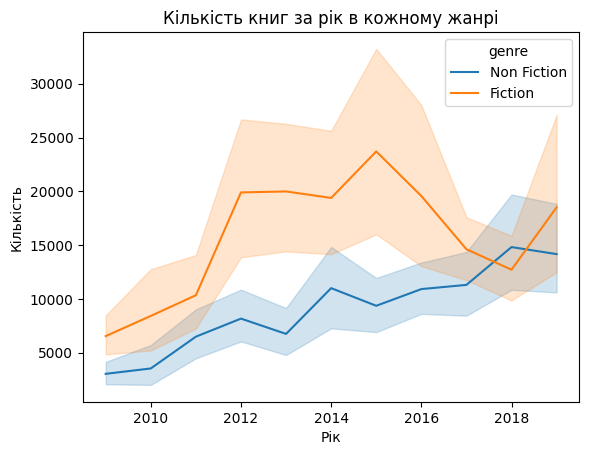

In [11]:
import seaborn as sns

sns.lineplot(data=data, x='year', y='reviews', hue='genre')

plt.xlabel('Рік')
plt.ylabel('Кількість')
plt.title('Кількість книг за рік в кожному жанрі')

plt.show()

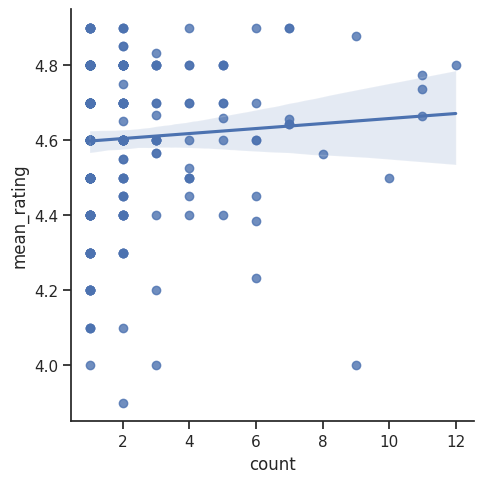

In [62]:
sns.lmplot(x="count", y="mean_rating", data=merged_data)

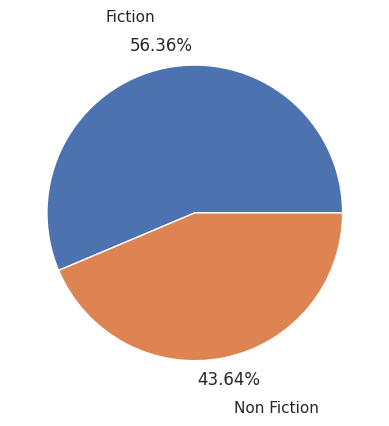

In [87]:
labels = [
    "Fiction",
    "Non Fiction",
]

data = data["genre"].value_counts()
explode = [0.15, 0, 0, 0, 0]
plt.pie(
    data,
    labels=labels,
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()